In [1]:
D = """
# 🎓 Student Performance Prediction & Adaptive Learning System
This project analyzes student activity and quiz results to recommend personalized study materials,
predict dropout likelihood, and understand factors influencing final exam scores.

Source: dataset - https://www.deepdatalake.com/details.php?dataset_id=93 
"""
print(D)



# 🎓 Student Performance Prediction & Adaptive Learning System
This project analyzes student activity and quiz results to recommend personalized study materials,
predict dropout likelihood, and understand factors influencing final exam scores.

Source: dataset - https://www.deepdatalake.com/details.php?dataset_id=93 



In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error


In [ ]:
# Load Dataset
df = pd.read_csv("./datasets/student_performance.csv")

# Show first 5 rows
df.head()

Student_ID  Age  Gender Education_Level       Course_Name  \
0     S00001   15  Female     High School  Machine Learning   
1     S00002   49    Male   Undergraduate     Python Basics   
2     S00003   20  Female   Undergraduate     Python Basics   
3     S00004   37  Female   Undergraduate      Data Science   
4     S00005   34  Female    Postgraduate     Python Basics   

   Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                   171              4           67                    2   
1                   156              4           64                    0   
2                   217              2           55                    2   
3                   489              1           65                   43   
4                   496              3           59                   34   

   Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                          89           Medium                51   
1                          94           Medium                92   
2                          67           Medium                45   
3                          60             High                59   
4                          88           Medium                93   

    Learning_Style  Feedback_Score Dropout_Likelihood  
0           Visual               1                 No  
1  Reading/Writing               5                 No  
2  Reading/Writing               1                 No  
3           Visual               4                 No  
4           Visual               3                 No

In [4]:
# Data Understanding
print("Dataset shape:", df.shape)
print("\nColumn Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())


Dataset shape: (10000, 15)

Column Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedb

In [5]:
# Check unique values before mapping
print("Gender:", df["Gender"].unique())
print("Education_Level:", df["Education_Level"].unique())
print("Course_Name:", df["Course_Name"].unique())
print("Engagement_Level:", df["Engagement_Level"].unique())
print("Learning_Style:", df["Learning_Style"].unique())
print("Dropout_Likelihood:", df["Dropout_Likelihood"].unique())

Gender: ['Female' 'Male' 'Other']
Education_Level: ['High School' 'Undergraduate' 'Postgraduate']
Course_Name: ['Machine Learning' 'Python Basics' 'Data Science' 'Web Development'
 'Cybersecurity']
Engagement_Level: ['Medium' 'High' 'Low']
Learning_Style: ['Visual' 'Reading/Writing' 'Kinesthetic' 'Auditory']
Dropout_Likelihood: ['No' 'Yes']


In [6]:
# Data Cleaning & Preprocessing
old_shape = df.shape

df = df.drop_duplicates()

df.dropna(inplace=True)

print("Deleted rows ::", old_shape[0]-df.shape[0], "\n Current Shape::", df.shape)

# Manual mapping
df["Gender"] = df["Gender"].map({
    "Female": 0,
    "Male": 1,
    "Other": 2,
})

df["Education_Level"] = df["Education_Level"].map({
    "High School": 0,
    "Undergraduate": 1,
    "Postgraduate": 2
})

df["Course_Name"] = df["Course_Name"].map({
    "Python Basics": 0,
    "Machine Learning": 1,
    "Data Science": 2,
    "Web Development": 3,
    "Cybersecurity": 4
})

df["Engagement_Level"] = df["Engagement_Level"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

df["Learning_Style"] = df["Learning_Style"].map({
    "Visual": 0,
    "Reading/Writing": 1,
    "Auditory": 2,
    "Kinesthetic": 3
})

df["Dropout_Likelihood"] = df["Dropout_Likelihood"].map({
    "No": 0,
    "Yes": 1
})

df.head()

Deleted rows :: 0 
 Current Shape:: (10000, 15)


Student_ID  Age  Gender  Education_Level  Course_Name  Time_Spent_on_Videos  \
0     S00001   15       0                0            1                   171   
1     S00002   49       1                1            0                   156   
2     S00003   20       0                1            0                   217   
3     S00004   37       0                1            2                   489   
4     S00005   34       0                2            0                   496   

   Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0              4           67                    2   
1              4           64                    0   
2              2           55                    2   
3              1           65                   43   
4              3           59                   34   

   Assignment_Completion_Rate  Engagement_Level  Final_Exam_Score  \
0                          89                 1                51   
1                          94                 1                92   
2                          67                 1                45   
3                          60                 2                59   
4                          88                 1                93   

   Learning_Style  Feedback_Score  Dropout_Likelihood  
0               0               1                   0  
1               1               5                   0  
2               1               1                   0  
3               0               4                   0  
4               0               3                   0

In [7]:
# Reverse mapping for visualization
gender_map = {1: "Male", 0: "Female", 2: "Other"}
edu_map = {0: "High School", 1: "Undergraduate", 2: "Postgraduate"}
course_map = {0: "Python Basics", 1: "Machine Learning", 2: "Data Science", 3: "Web Development",4: "Cybersecurity"}
eng_map = {0: "Low", 1: "Medium", 2: "High"}
style_map = {0: "Visual", 1: "Reading/Writing", 2: "Auditory", 3: "Kinesthetic"}
dropout_map = {0: "No", 1: "Yes"}

df_plot = df.copy()
df_plot["Gender"] = df_plot["Gender"].map(gender_map)
df_plot["Education_Level"] = df_plot["Education_Level"].map(edu_map)
df_plot["Course_Name"] = df_plot["Course_Name"].map(course_map)
df_plot["Engagement_Level"] = df_plot["Engagement_Level"].map(eng_map)
df_plot["Learning_Style"] = df_plot["Learning_Style"].map(style_map)
df_plot["Dropout_Likelihood"] = df_plot["Dropout_Likelihood"].map(dropout_map)


numeric_cols = ["Age", "Time_Spent_on_Videos", "Quiz_Attempts", 
                "Quiz_Scores", "Forum_Participation", "Assignment_Completion_Rate", 
                "Final_Exam_Score", "Feedback_Score"]

categorical_cols = ["Gender", "Education_Level", "Course_Name", 
                    "Engagement_Level", "Learning_Style", "Dropout_Likelihood"]


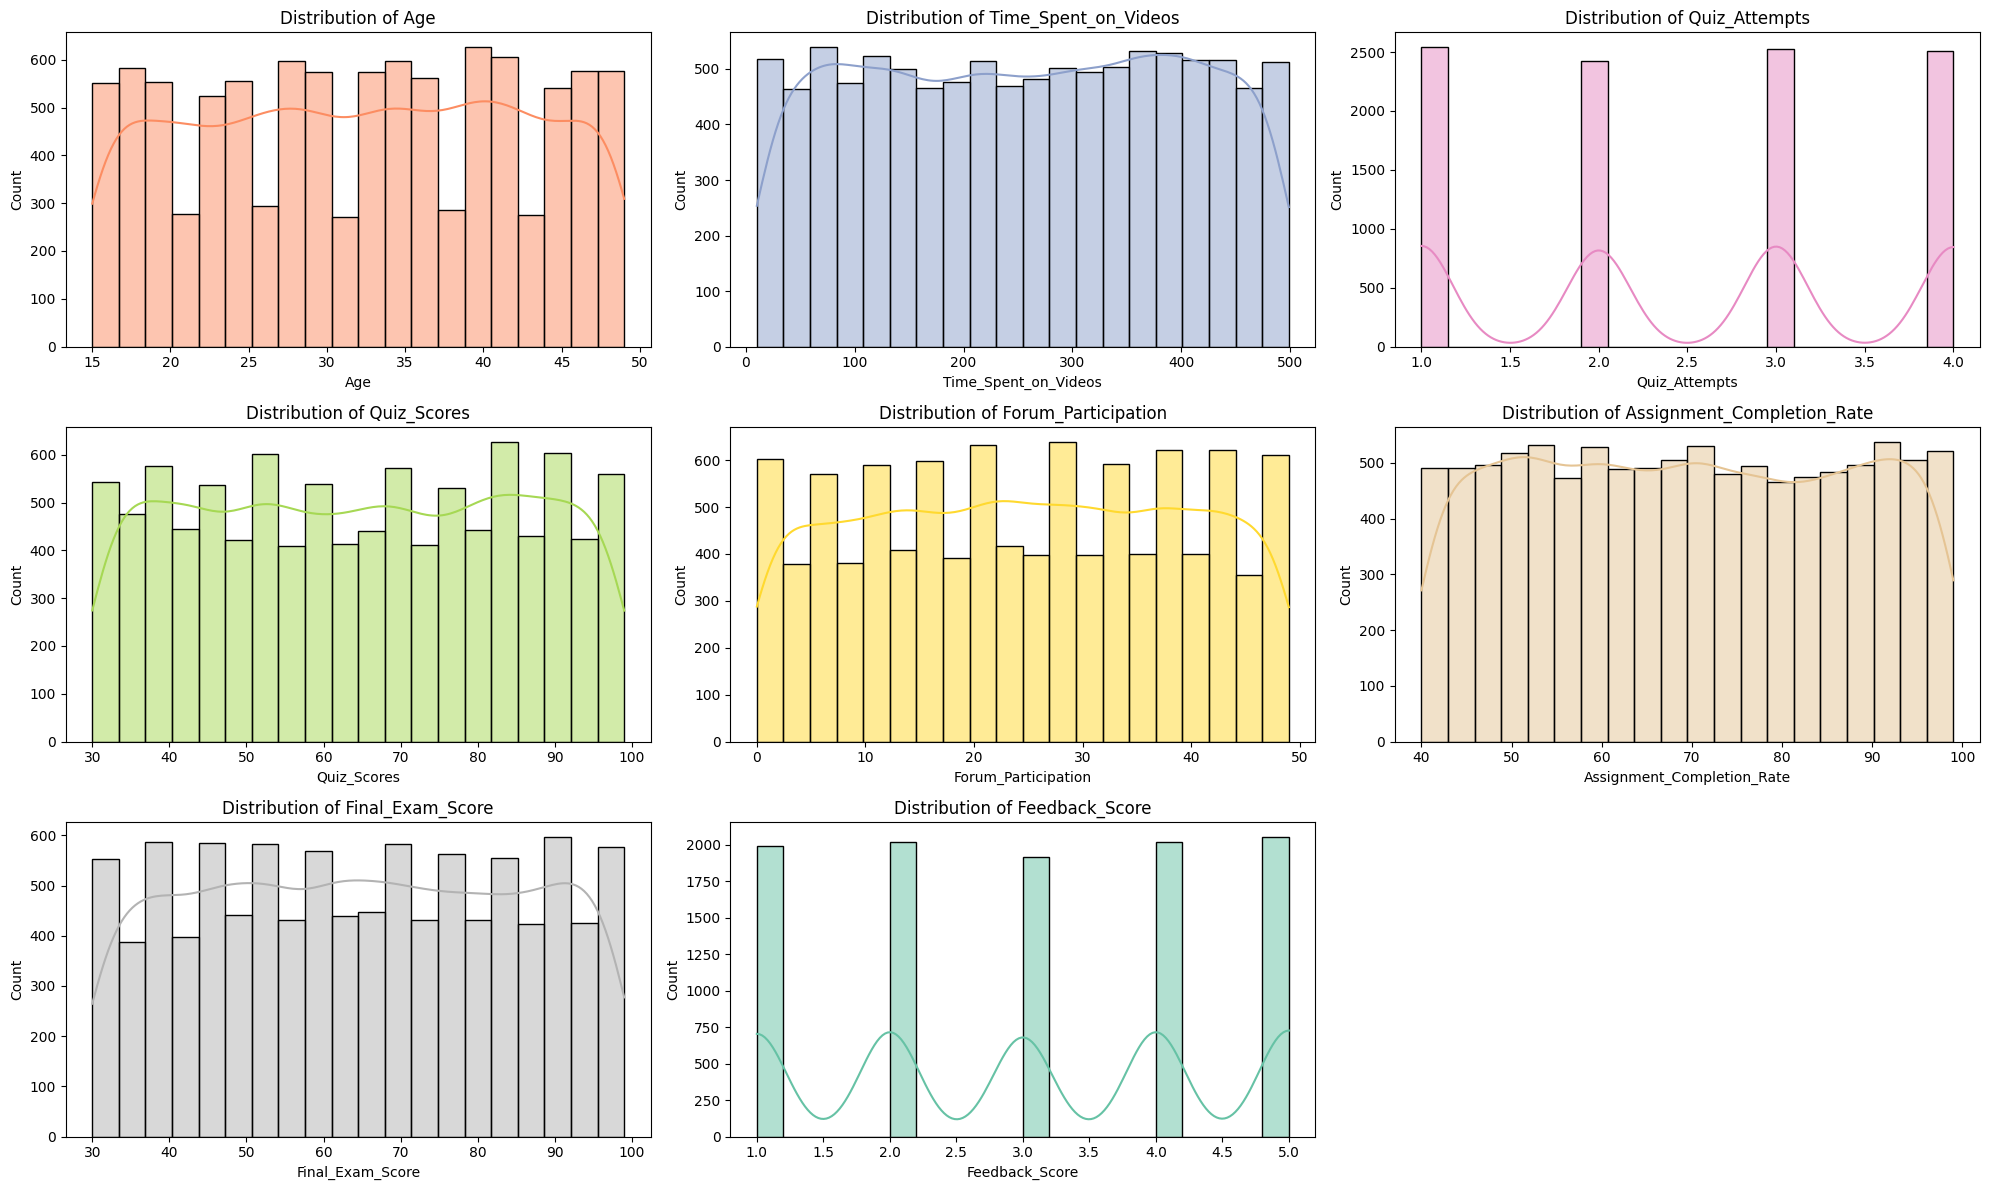

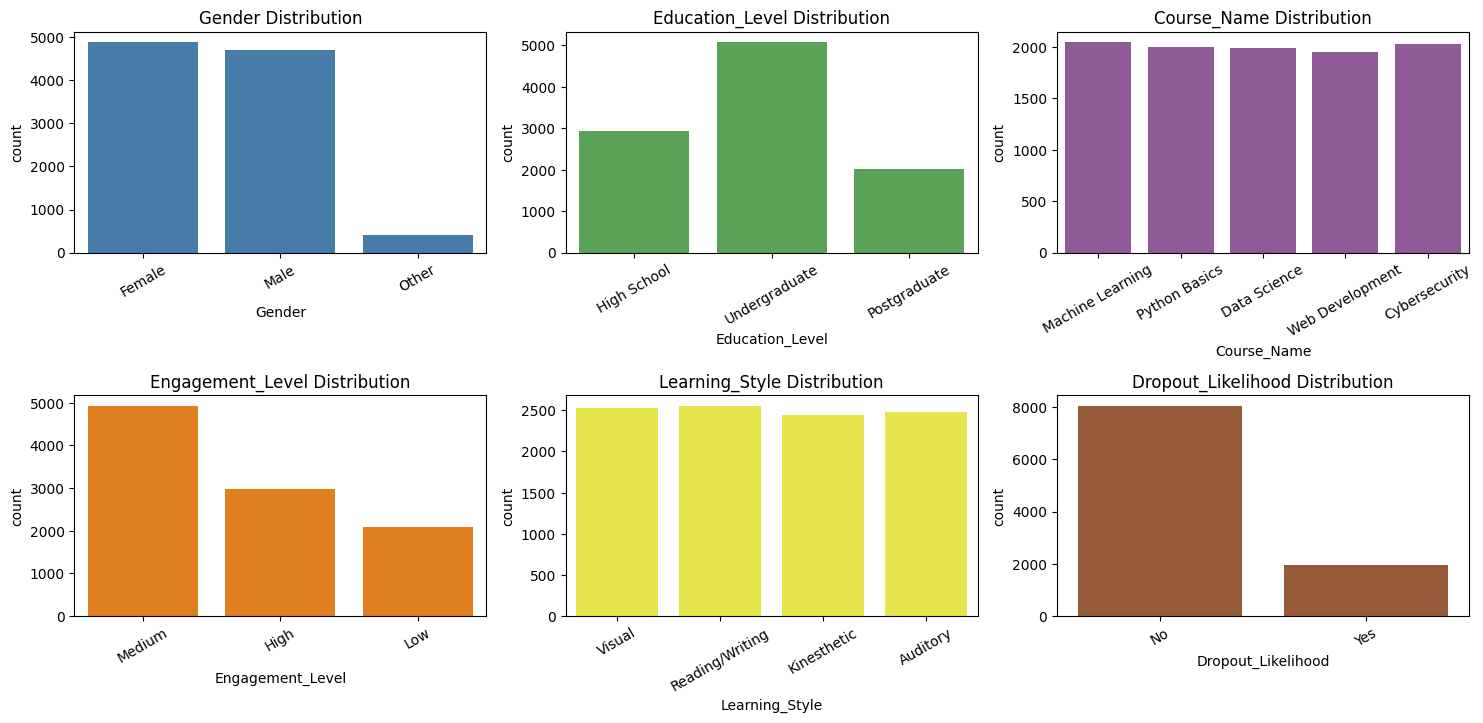

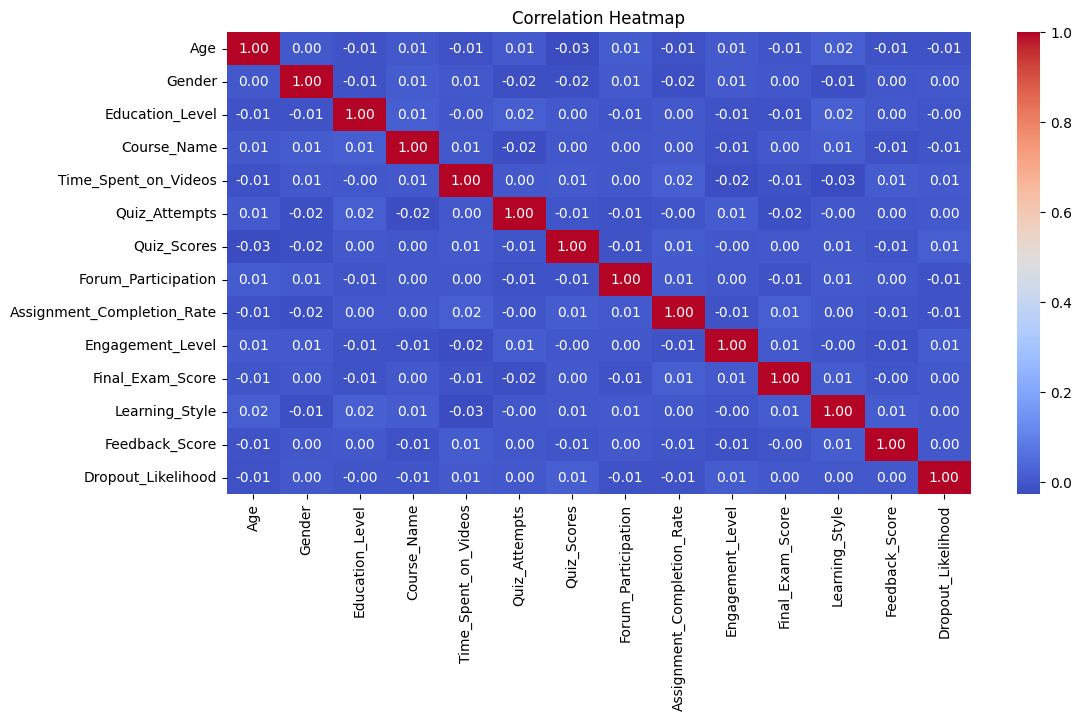

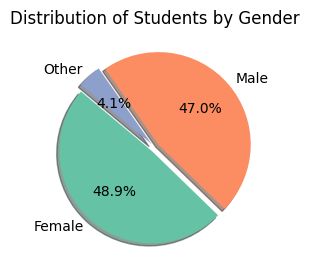

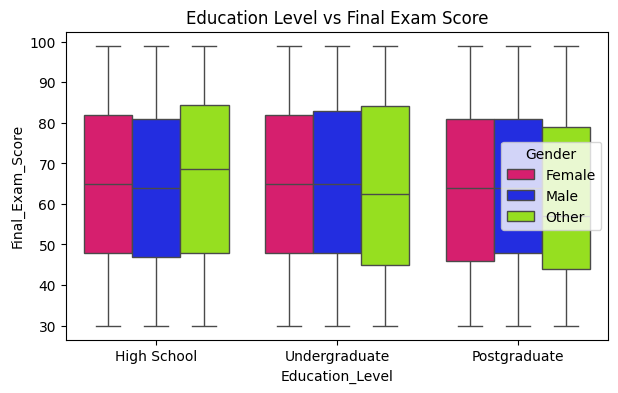

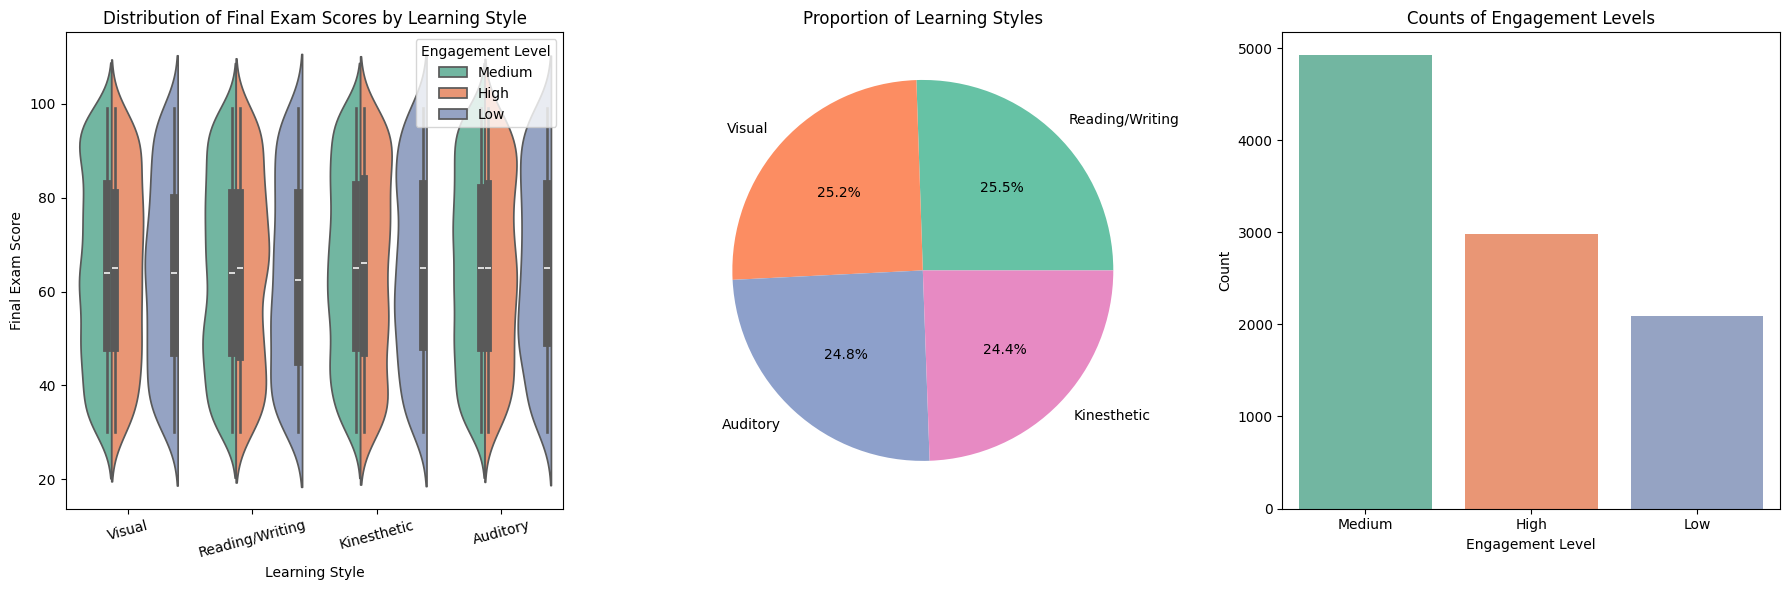

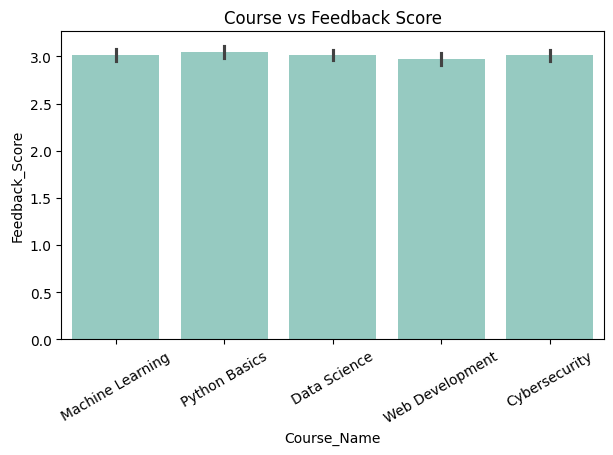

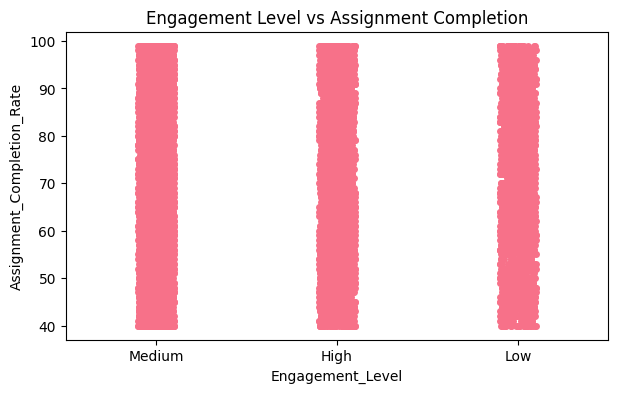

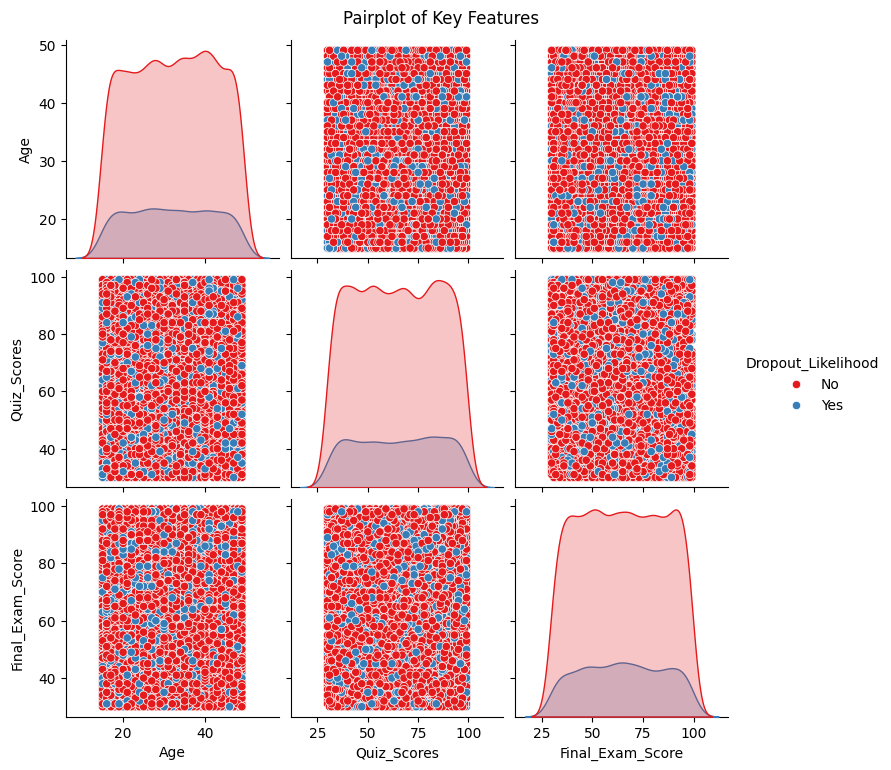

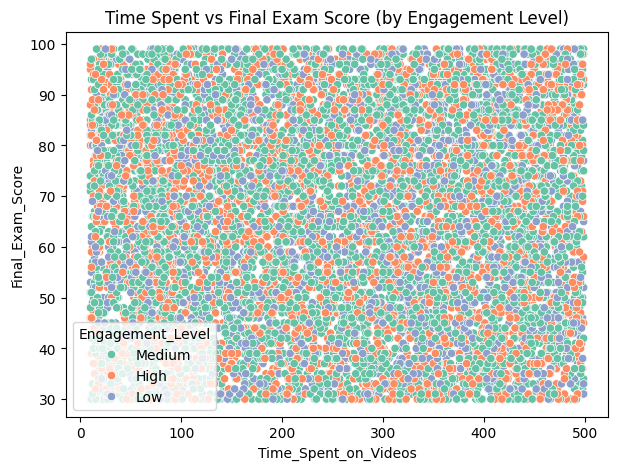

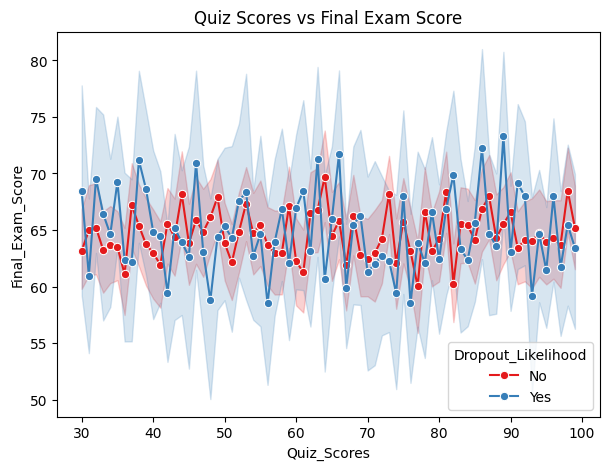

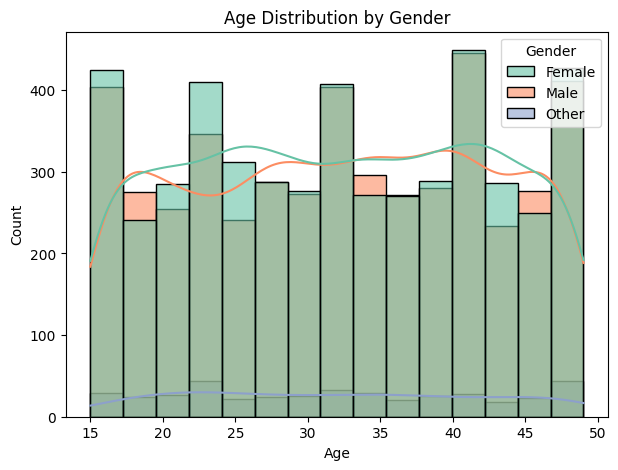

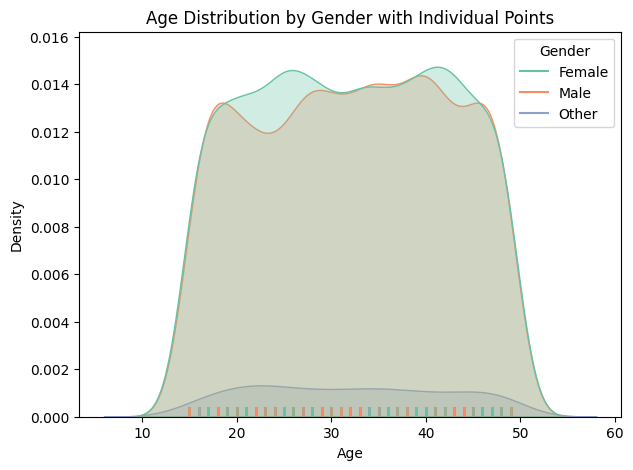

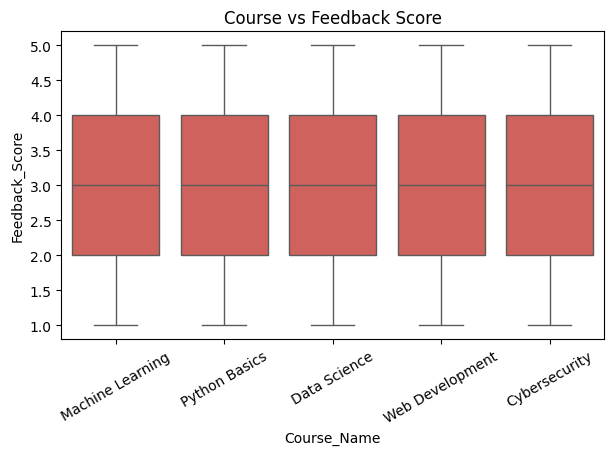

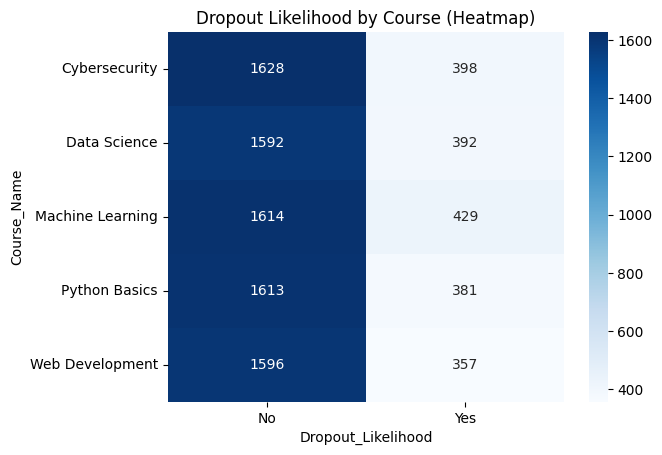

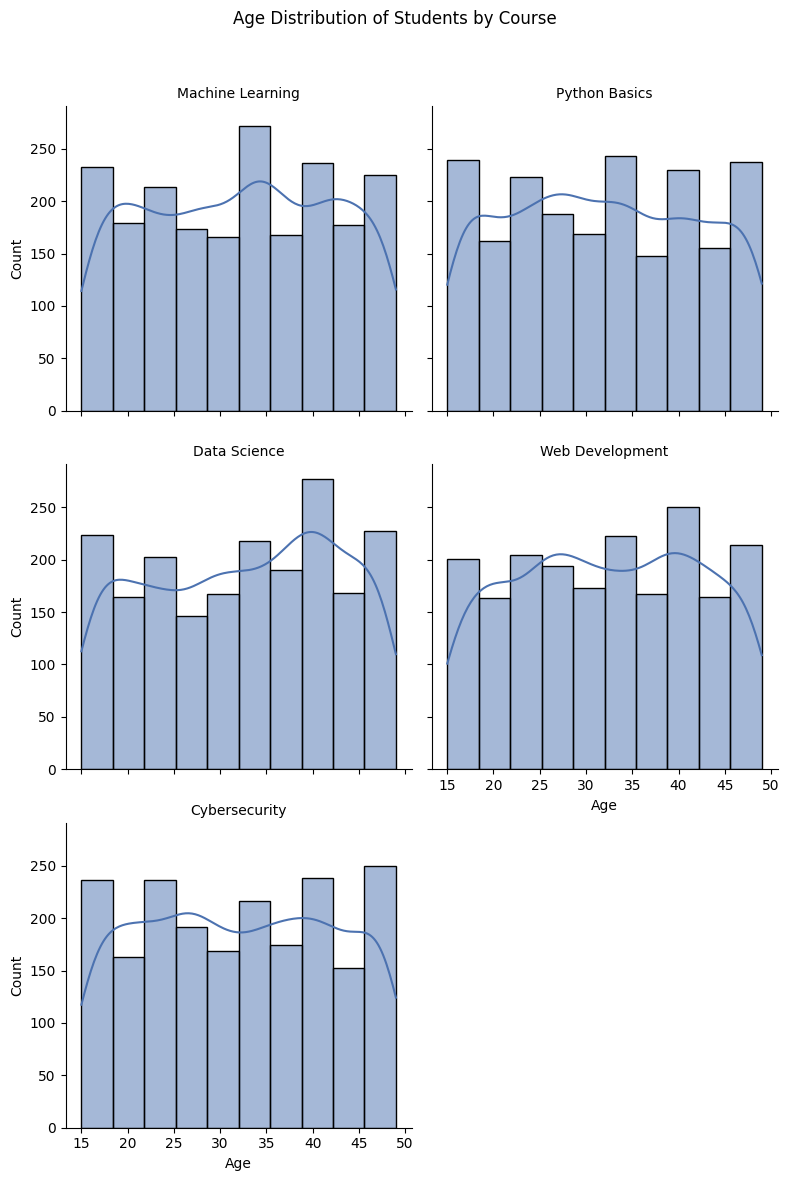

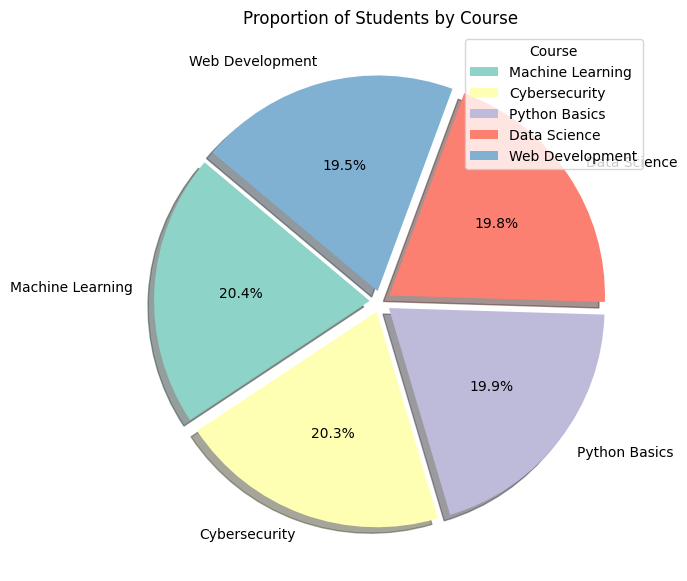

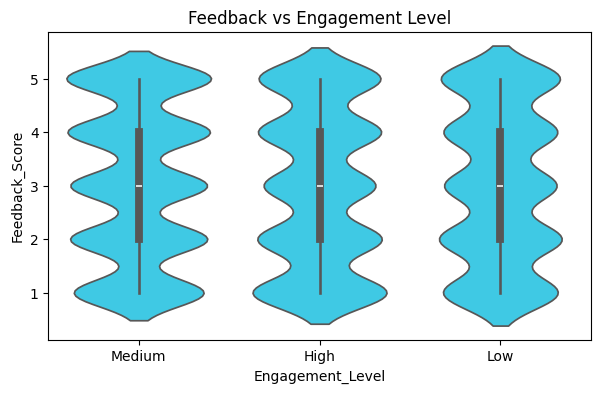

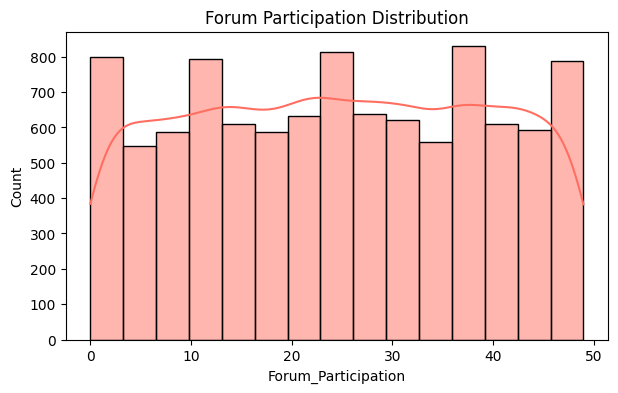

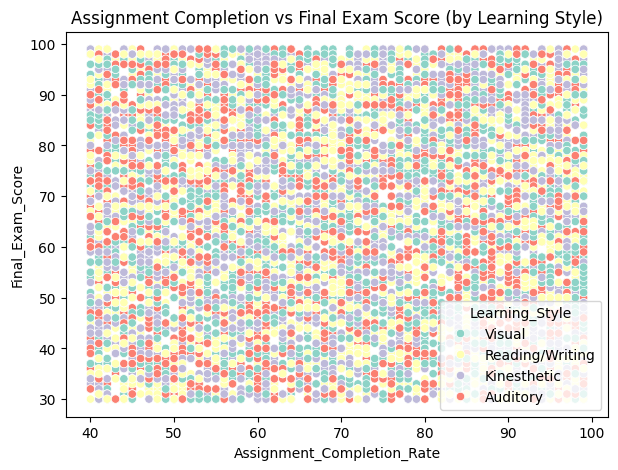

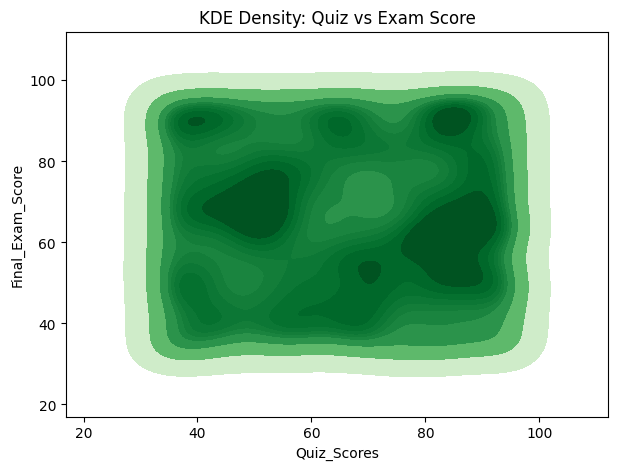

In [8]:
# Data Analysis (EDA) - Visualizations

# 1. Histograms for Numeric Features
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_plot[col], kde=True, bins=20, color=sns.color_palette("Set2")[i % 8])
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 2. Countplots for Categorical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df_plot, color=sns.color_palette("Set1")[i % 8])
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pie chart: Distribution of students by Gender
plt.figure(figsize=(3,3))
gender_counts = df_plot["Gender"].value_counts()
colors = sns.color_palette("Set2", len(gender_counts))
explode = [0.05]*len(gender_counts)  

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140, 
        colors=colors, shadow=True, explode=explode)
plt.title("Distribution of Students by Gender")
# plt.legend(title="Gender", loc="upper right")
plt.show()

# Box Plot 
plt.figure(figsize=(7,4))
sns.boxplot(x="Education_Level", y="Final_Exam_Score",hue="Gender" ,data=df_plot, palette=["#f5006a", "#0411ff", "#9dff00"])
plt.title("Education Level vs Final Exam Score")
plt.show()

# Violinplot, pie, count Learning Style vs Final Exam Score split by Engagement Level
fig, axes = plt.subplots(1, 3, figsize=(18,6)) 

# Violin plot
sns.violinplot(
    x="Learning_Style", 
    y="Final_Exam_Score", 
    hue="Engagement_Level", 
    data=df_plot, 
    split=True, 
    inner="box", 
    palette="Set2",
    ax=axes[0]
)
axes[0].set_title("Distribution of Final Exam Scores by Learning Style")
axes[0].set_xlabel("Learning Style")
axes[0].set_ylabel("Final Exam Score")
axes[0].tick_params(axis='x', rotation=15)
axes[0].legend(title="Engagement Level", loc="upper right")

# Pie chart: proportion of each Learning Style
learning_counts = df_plot["Learning_Style"].value_counts()
axes[1].pie(learning_counts, labels=learning_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axes[1].set_title("Proportion of Learning Styles")

# Count plot: counts of Engagement Level
sns.countplot(x="Engagement_Level", hue="Engagement_Level", data=df_plot, palette="Set2", ax=axes[2], legend=False)
axes[2].set_title("Counts of Engagement Levels")
axes[2].set_xlabel("Engagement Level")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


# 6. Barplot: Course vs Avg Feedback Score
plt.figure(figsize=(7,4))
sns.barplot(x="Course_Name", y="Feedback_Score", data=df_plot, color=sns.color_palette("Set3")[0])
plt.title("Course vs Feedback Score")
plt.xticks(rotation=30)
plt.show()

# 7. Stripplot: Engagement vs Assignment Completion
plt.figure(figsize=(7,4))
sns.stripplot(x="Engagement_Level", y="Assignment_Completion_Rate", data=df_plot, color=sns.color_palette("husl")[0], jitter=True)
plt.title("Engagement Level vs Assignment Completion")
plt.show()

# # 8. Swarmplot: Quiz Attempts vs Dropout
# plt.figure(figsize=(7,4))
# sns.swarmplot(x="Dropout_Likelihood", y="Quiz_Attempts", data=df_plot, color=sns.color_palette("Set1")[1])
# plt.title("Quiz Attempts vs Dropout Likelihood")
# plt.show()

# 9. Pairplot: Selected Numerical Features
sns.pairplot(df_plot[["Age", "Quiz_Scores", "Final_Exam_Score", "Dropout_Likelihood"]], hue="Dropout_Likelihood", palette="Set1")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# 10. Scatterplot: Time Spent vs Final Exam Score
plt.figure(figsize=(7,5))
sns.scatterplot(x="Time_Spent_on_Videos", y="Final_Exam_Score", hue="Engagement_Level", data=df_plot, palette="Set2")
plt.title("Time Spent vs Final Exam Score (by Engagement Level)")
plt.show()

# 11. Lineplot: Quiz Scores vs Exam Score
plt.figure(figsize=(7,5))
sns.lineplot(x="Quiz_Scores", y="Final_Exam_Score", hue="Dropout_Likelihood", data=df_plot, palette="Set1", marker="o")
plt.title("Quiz Scores vs Final Exam Score")
plt.show()

# 12. KDEplot & Histplot: Age Distribution by Gender
plt.figure(figsize=(7,5))
sns.histplot(data=df_plot, x="Age", hue="Gender", bins=15, kde=True, palette="Set2", alpha=0.6)
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(7,5))
sns.kdeplot(data=df_plot, x="Age", hue="Gender", fill=True, palette="Set2", alpha=0.3)
sns.rugplot(data=df_plot, x="Age", hue="Gender", palette="Set2")
plt.title("Age Distribution by Gender with Individual Points")
plt.show()


# # 13. Barplot: Dropout Rate by Education Level
# plt.figure(figsize=(7,4))
# sns.barplot(x="Education_Level", y="Dropout_Likelihood", data=df_plot, estimator=lambda x: sum(x=="Yes")/len(x), color=sns.color_palette("Paired")[0])
# plt.title("Dropout Rate by Education Level")
# plt.show()

# 14. Boxplot: Course vs Feedback Score
plt.figure(figsize=(7,4))
sns.boxplot(x="Course_Name", y="Feedback_Score", data=df_plot, color=sns.color_palette("Spectral")[0])
plt.title("Course vs Feedback Score")
plt.xticks(rotation=30)
plt.show()

# 15. Heatmap: Categorical Cross Tab (Dropout vs Course)
ct = pd.crosstab(df_plot["Course_Name"], df_plot["Dropout_Likelihood"])
sns.heatmap(ct, annot=True, cmap="Blues", fmt="d")
plt.title("Dropout Likelihood by Course (Heatmap)")
plt.show()

#  Age vs Course
# Histogram per course using FacetGrid
g = sns.FacetGrid(df_plot, col="Course_Name", col_wrap=2, height=4)
g.map_dataframe(sns.histplot, x="Age", bins=10, color="#4C72B0", kde=True)
g.set_axis_labels("Age", "Count")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution of Students by Course")
plt.show()

# Pie chart: Proportion of students by Course
plt.figure(figsize=(7,7))
course_counts = df_plot["Course_Name"].value_counts()
colors = sns.color_palette("Set3", len(course_counts))
explode = [0.05]*len(course_counts)  # slightly separate slices
plt.pie(course_counts, labels=course_counts.index, autopct="%1.1f%%", startangle=140, 
        colors=colors, shadow=True, explode=explode)
plt.title("Proportion of Students by Course")
plt.legend(title="Course", loc="upper right")
plt.show()


# 17. Violinplot: Feedback by Engagement Level
plt.figure(figsize=(7,4))
sns.violinplot(x="Engagement_Level", y="Feedback_Score", data=df_plot, color=sns.color_palette("cool")[0])
plt.title("Feedback vs Engagement Level")
plt.show()

# 18. Histogram: Forum Participation
plt.figure(figsize=(7,4))
sns.histplot(df_plot["Forum_Participation"], bins=15, color="#FF6F61", kde=True)
plt.title("Forum Participation Distribution")
plt.show()

# 19. Scatterplot: Assignment Completion vs Exam Score
plt.figure(figsize=(7,5))
sns.scatterplot(x="Assignment_Completion_Rate", y="Final_Exam_Score", hue="Learning_Style", data=df_plot, palette="Set3")
plt.title("Assignment Completion vs Final Exam Score (by Learning Style)")
plt.show()

# 20. Pairwise KDEplot: Quiz vs Exam Score
plt.figure(figsize=(7,5))
sns.kdeplot(x="Quiz_Scores", y="Final_Exam_Score", data=df_plot, cmap="Greens", fill=True, thresh=0.05)
plt.title("KDE Density: Quiz vs Exam Score")
plt.show()


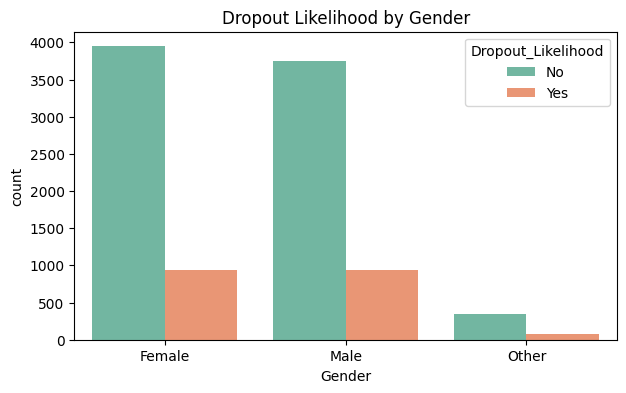

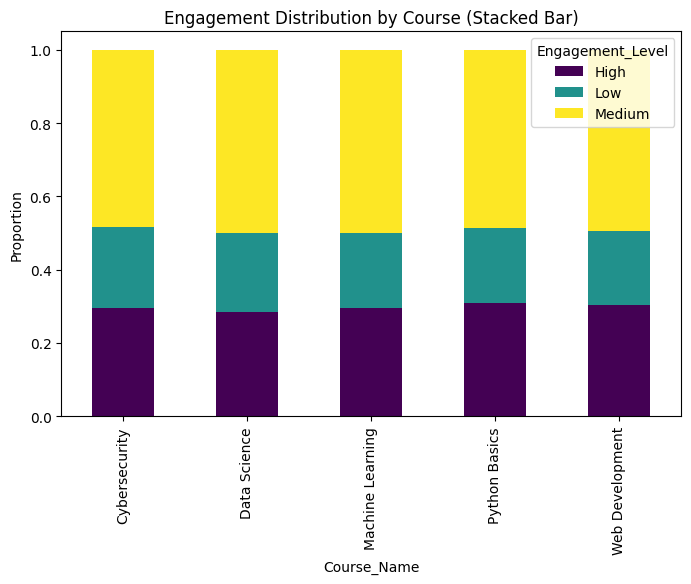

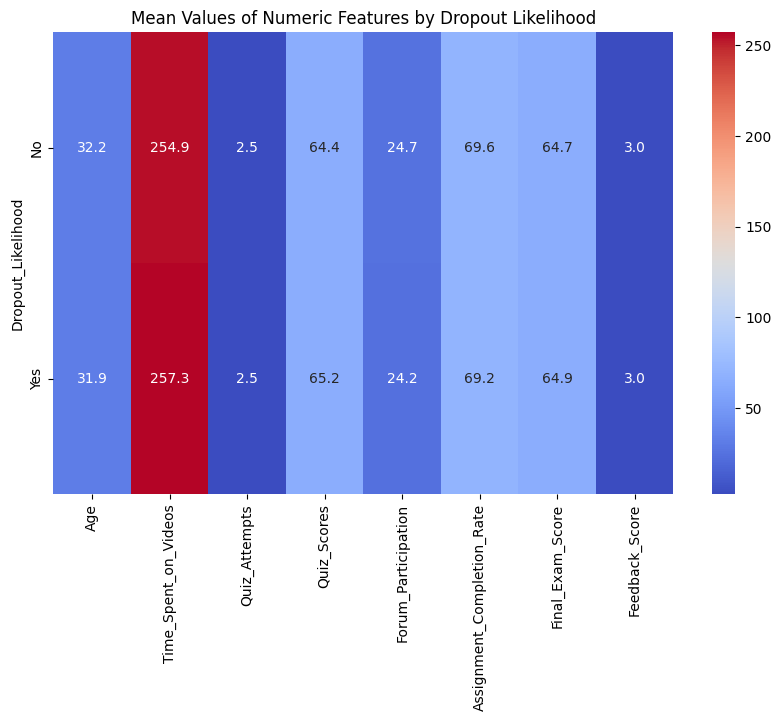

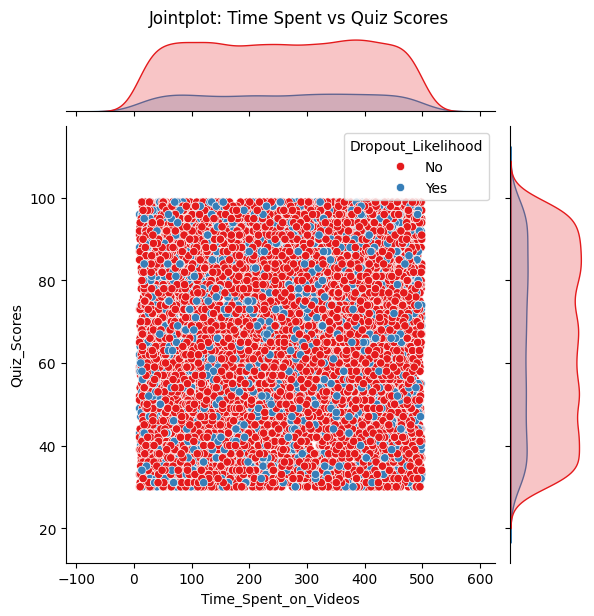

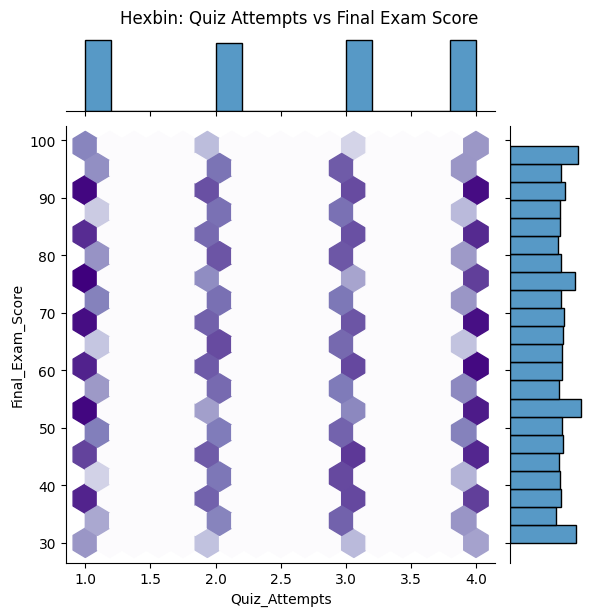

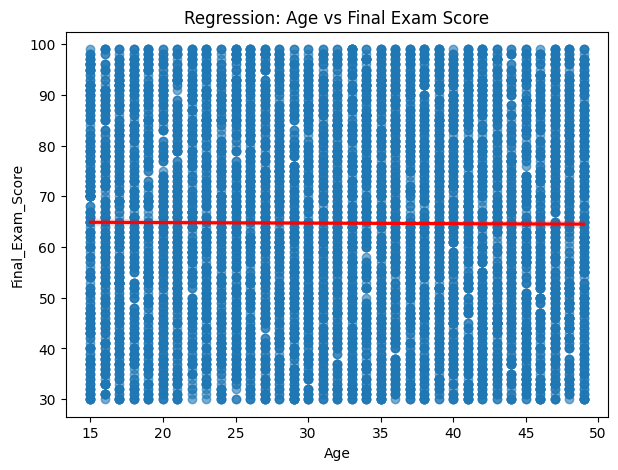

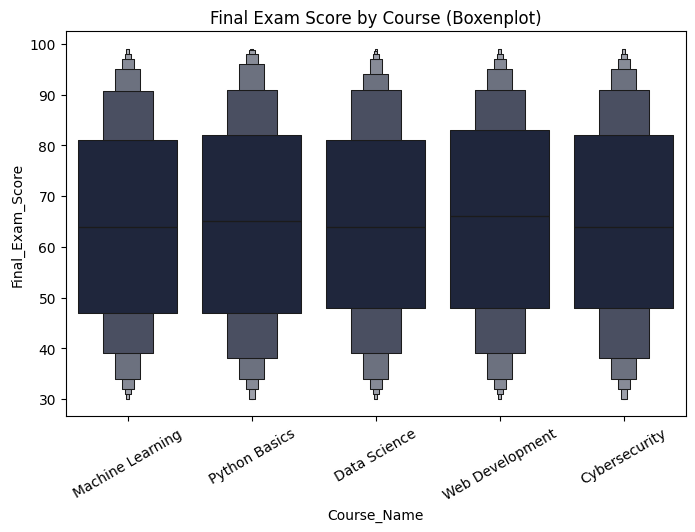

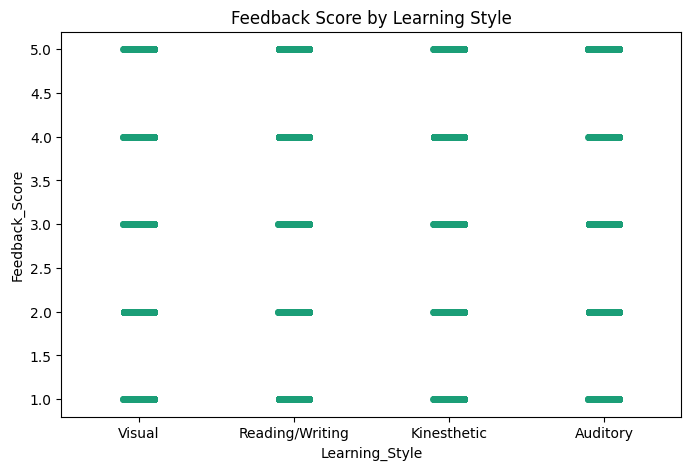

<Figure size 1000x600 with 0 Axes>

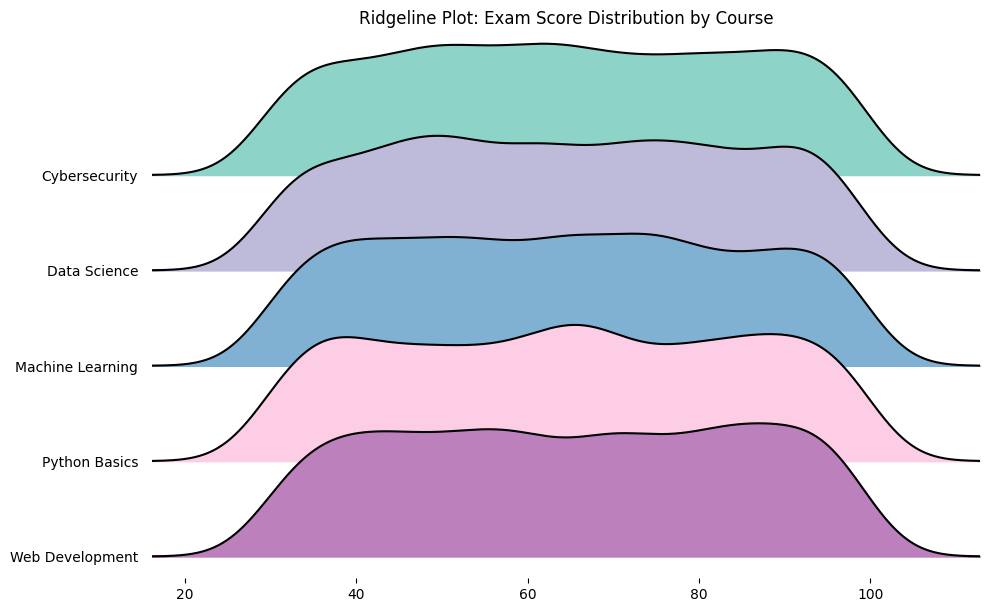

In [9]:
# 21 Countplot: Dropout Likelihood by Gender
plt.figure(figsize=(7,4))
sns.countplot(x="Gender", hue="Dropout_Likelihood", data=df_plot, palette="Set2")
plt.title("Dropout Likelihood by Gender")
plt.show()

# 22 Stacked Barplot (Crosstab) - Course vs Engagement
ct = pd.crosstab(df_plot["Course_Name"], df_plot["Engagement_Level"], normalize="index")
ct.plot(kind="bar", stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Engagement Distribution by Course (Stacked Bar)")
plt.ylabel("Proportion")
plt.show()

# 23 Heatmap of Numeric Features vs Dropout
plt.figure(figsize=(10,6))
sns.heatmap(df_plot.groupby("Dropout_Likelihood")[numeric_cols].mean(), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Mean Values of Numeric Features by Dropout Likelihood")
plt.show()

# 24 Jointplot: Time Spent vs Quiz Score
sns.jointplot(data=df_plot, x="Time_Spent_on_Videos", y="Quiz_Scores", kind="scatter", hue="Dropout_Likelihood", palette="Set1")
plt.suptitle("Jointplot: Time Spent vs Quiz Scores", y=1.02)
plt.show()

# 25 Jointplot: Quiz Attempts vs Final Exam Score (Hexbin)
sns.jointplot(data=df_plot, x="Quiz_Attempts", y="Final_Exam_Score", kind="hex", cmap="Purples")
plt.suptitle("Hexbin: Quiz Attempts vs Final Exam Score", y=1.02)
plt.show()

# 26 Regression Plot: Age vs Final Exam Score
plt.figure(figsize=(7,5))
sns.regplot(x="Age", y="Final_Exam_Score", data=df_plot, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Regression: Age vs Final Exam Score")
plt.show()

# 27 Boxenplot: Final Exam by Course
plt.figure(figsize=(8,5))
sns.boxenplot(x="Course_Name", y="Final_Exam_Score", data=df_plot, color=sns.color_palette("cubehelix")[0])
plt.title("Final Exam Score by Course (Boxenplot)")
plt.xticks(rotation=30)
plt.show()

# 28 Stripplot: Feedback Score by Learning Style
plt.figure(figsize=(8,5))
sns.stripplot(x="Learning_Style", y="Feedback_Score", data=df_plot, jitter=True, color=sns.color_palette("Dark2")[0])
plt.title("Feedback Score by Learning Style")
plt.show()

# 29 Parallel Categories Plot: Course → Engagement → Dropout
from plotly.express import parallel_categories
import plotly.express as px

fig = parallel_categories(df_plot[["Course_Name", "Engagement_Level", "Dropout_Likelihood"]],
                          color=df_plot["Dropout_Likelihood"].map({"No":0, "Yes":1}),
                          color_continuous_scale=px.colors.sequential.RdBu)
fig.update_layout(title="Parallel Categories: Course → Engagement → Dropout")
fig.show()

# 30 Ridgeline Plot: Exam Score Distribution by Course
import joypy
plt.figure(figsize=(10,6))
joypy.joyplot(df_plot, by="Course_Name", column="Final_Exam_Score", colormap=plt.cm.Set3, figsize=(10,6))
plt.title("Ridgeline Plot: Exam Score Distribution by Course")
plt.show()


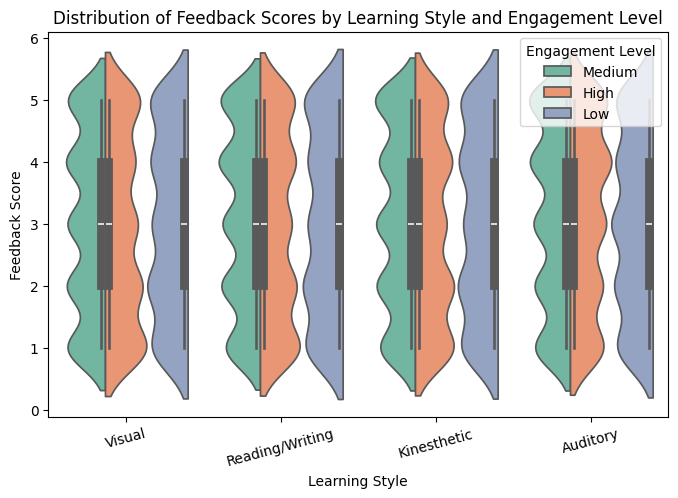

In [10]:
# Violinplot: Feedback Score by Learning Style, split by Engagement Level
plt.figure(figsize=(8,5))
sns.violinplot(x="Learning_Style", y="Feedback_Score", hue="Engagement_Level",
               data=df_plot, split=True, inner="box", palette="Set2")
plt.title("Distribution of Feedback Scores by Learning Style and Engagement Level")
plt.xlabel("Learning Style")
plt.ylabel("Feedback Score")
plt.xticks(rotation=15)
plt.legend(title="Engagement Level", loc="upper right")
plt.show()


In [11]:
# Summary 
print("\nSUMMARY STATISTICS \n")

# 1. Overall averages
print("Average Final Exam Score:", round(df_plot["Final_Exam_Score"].mean(), 2))
print("Median Final Exam Score:", round(df_plot["Final_Exam_Score"].median(), 2))
print("Average Feedback Score:", round(df_plot["Feedback_Score"].mean(), 2))

# 2. Gender-based performance
print("\n Exam Scores by Gender ")
print(df_plot.groupby("Gender")["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 3. Education level and dropout
print("\n Dropout Rate by Education Level ")
dropout_rate = df_plot.groupby("Education_Level")["Dropout_Likelihood"].apply(lambda x: (x=="Yes").mean())
print((dropout_rate*100).round(2).reset_index(name="Dropout_Rate(%)"))

# 4. Course-wise performance
print("\n Average Exam Score by Course ")
print(df_plot.groupby("Course_Name")["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 5. Engagement level insights
print("\n Engagement vs Average Feedback ")
print(df_plot.groupby("Engagement_Level")["Feedback_Score"].mean().round(2).reset_index(name="Avg_Feedback_Score"))

# 6. Learning style performance
print("\n Average Exam Score by Learning Style ")
print(df_plot.groupby("Learning_Style")["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 7. Top 5 correlations (numeric only)
print("\n Top 5 Correlations with Final Exam Score ")
corrs = df_plot.corr(numeric_only=True)["Final_Exam_Score"].sort_values(ascending=False).head(6)
print(corrs.reset_index().rename(columns={"index": "Feature", "Final_Exam_Score": "Correlation"}))

# 8. Dropout distribution
print("\n Dropout Distribution ")
print((df_plot["Dropout_Likelihood"].value_counts(normalize=True).round(2) * 100).reset_index(name="Percentage"))

# 9. Quiz attempts vs performance
df_plot["Quiz_Attempts_Group"] = pd.cut(df_plot["Quiz_Attempts"], bins=[0,2,5,10,20],
                                        labels=["Low(0-2)","Medium(3-5)","High(6-10)","Very High(11-20)"])
print("\n Avg Exam Score by Quiz Attempts Group ")
print(df_plot.groupby("Quiz_Attempts_Group", observed=False)["Final_Exam_Score"].mean().round(2)
      .reset_index(name="Avg_Final_Exam_Score"))

# 10. Time spent on videos vs performance
df_plot["Video_Time_Quartile"] = pd.qcut(df_plot["Time_Spent_on_Videos"], 4,
                                         labels=["Q1-Low","Q2","Q3","Q4-High"])
print("\n Avg Exam Score by Video Time Quartiles ")
print(df_plot.groupby("Video_Time_Quartile", observed=False)["Final_Exam_Score"].mean().round(2)
      .reset_index(name="Avg_Final_Exam_Score"))

# 11. Pass/Fail Analysis
pass_mark = 50
df_plot["Passed"] = df_plot["Final_Exam_Score"] >= pass_mark
print("\n Pass Rate by Course ")
print(df_plot.groupby("Course_Name")["Passed"].mean().round(2).reset_index(name="Pass_Rate"))

# 12. Top/Bottom Performers
top_10pct = df_plot["Final_Exam_Score"].quantile(0.9)
bottom_10pct = df_plot["Final_Exam_Score"].quantile(0.1)
print("\n Top & Bottom Performers ")
print("Top 10% students:", (df_plot["Final_Exam_Score"] >= top_10pct).sum())
print("Bottom 10% students:", (df_plot["Final_Exam_Score"] <= bottom_10pct).sum())

# 13. Engagement Impact
engagement_cols = ["Time_Spent_on_Videos","Assignment_Completion_Rate","Forum_Participation"]
print("\n Avg Exam Score by High vs Low Engagement ")
for col in engagement_cols:
    median_val = df_plot[col].median()
    df_plot[col+"_High"] = df_plot[col] >= median_val
    print(f"\n{col}:")
    print(df_plot.groupby(col+"_High")["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 14. Dropout vs Performance
print("\n Avg Exam Score by Dropout Status ")
print(df_plot.groupby("Dropout_Likelihood")["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 15. Feedback vs Performance
print("\n Correlation: Feedback vs Final Exam ")
print(df_plot[["Feedback_Score","Final_Exam_Score"]].corr().round(2))

# 16. Learning Style vs Engagement Level
print("\n Learning Style vs Engagement Level (%) ")
print(pd.crosstab(df_plot["Learning_Style"], df_plot["Engagement_Level"], normalize="index").round(2)*100)

# 17. Quartiles for Numeric Features
numeric_quartiles = ["Quiz_Scores","Assignment_Completion_Rate"]
for col in numeric_quartiles:
    df_plot[col+"_Quartile"] = pd.qcut(df_plot[col], 4, labels=["Q1-Low","Q2","Q3","Q4-High"])
    print(f"\n Avg Exam Score by {col} Quartiles ")
    print(df_plot.groupby(col+"_Quartile", observed=False)["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 18. Score per hour
df_plot["Score_per_Hour"] = df_plot["Final_Exam_Score"]/df_plot["Time_Spent_on_Videos"]
print("\n Avg Score per Hour by Course ")
print(df_plot.groupby("Course_Name")["Score_per_Hour"].mean().round(2).reset_index(name="Avg_Score_per_Hour"))

# 19. Score variance by Course
print("\n Score Variance by Course ")
print(df_plot.groupby("Course_Name")["Final_Exam_Score"].var().round(2).reset_index(name="Score_Variance"))

# 20. Skewness & Kurtosis for numeric features
from scipy.stats import skew, kurtosis
print("\n Skewness & Kurtosis for Numeric Features ")
for col in numeric_cols:
    print(f"{col}: Skew={skew(df_plot[col].dropna()).round(2)}, Kurtosis={kurtosis(df_plot[col].dropna()).round(2)}")

# 21. Exam Score Range by Learning Style
print("\n Exam Score Range by Learning Style ")
range_df = df_plot.groupby("Learning_Style")["Final_Exam_Score"].agg(["min","max"]).reset_index()
print(range_df.rename(columns={"min":"Min_Score","max":"Max_Score"}))

# 22. Dropout Rate by Engagement Level
print("\n Dropout Rate by Engagement Level ")
dropout_by_engagement = df_plot.groupby("Engagement_Level")["Dropout_Likelihood"].apply(lambda x: (x=="Yes").mean()*100).round(2)
print(dropout_by_engagement.reset_index(name="Dropout_Rate(%)"))

# 23. High vs Low Quiz Participation Impact
quiz_median = df_plot["Quiz_Scores"].median()
df_plot["High_Quiz"] = df_plot["Quiz_Scores"] >= quiz_median
print("\n Avg Exam Score: High vs Low Quiz Participation ")
print(df_plot.groupby("High_Quiz")["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 24. Forum Participation Impact
forum_median = df_plot["Forum_Participation"].median()
df_plot["High_Forum"] = df_plot["Forum_Participation"] >= forum_median
print("\n Avg Exam Score: High vs Low Forum Participation ")
print(df_plot.groupby("High_Forum")["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 25. Combined Engagement Score
df_plot["Engagement_Score"] = df_plot["Time_Spent_on_Videos"] + df_plot["Assignment_Completion_Rate"] + df_plot["Forum_Participation"]
df_plot["Engagement_Level_Cat"] = pd.qcut(df_plot["Engagement_Score"], 3, labels=["Low","Medium","High"])
print("\n Avg Exam Score by Combined Engagement Level ")
print(df_plot.groupby("Engagement_Level_Cat", observed=False)["Final_Exam_Score"].mean().round(2).reset_index(name="Avg_Final_Exam_Score"))

# 26. Performance vs Multiple Engagement Dimensions
print("\n Avg Exam Score by Video & Assignment Quartiles ")
df_plot["Video_Quartile"] = pd.qcut(df_plot["Time_Spent_on_Videos"], 4, labels=["Q1","Q2","Q3","Q4"])
df_plot["Assignment_Quartile"] = pd.qcut(df_plot["Assignment_Completion_Rate"], 4, labels=["Q1","Q2","Q3","Q4"])
cross_tab = df_plot.groupby(["Video_Quartile","Assignment_Quartile"], observed=False)["Final_Exam_Score"].mean().round(2).reset_index()
print(cross_tab)

# 27. Identify Students at Risk (Low Score & High Dropout Probability)
low_score_threshold = 50
high_dropout = df_plot[df_plot["Dropout_Likelihood"]=="Yes"]
at_risk = high_dropout[high_dropout["Final_Exam_Score"] < low_score_threshold]
print("\n Students at Risk (Low Score & High Dropout) ")
print(at_risk[["Student_ID","Final_Exam_Score","Dropout_Likelihood"]].head())

# 28. Top 5 Courses by Average Score
print("\n Top 5 Courses by Avg Exam Score ")
print(df_plot.groupby("Course_Name")["Final_Exam_Score"].mean().round(2).sort_values(ascending=False).head(5).reset_index(name="Avg_Final_Exam_Score"))

# 29. Bottom 5 Courses by Average Score
print("\n Bottom 5 Courses by Avg Exam Score ")
print(df_plot.groupby("Course_Name")["Final_Exam_Score"].mean().round(2).sort_values(ascending=True).head(5).reset_index(name="Avg_Final_Exam_Score"))

# 30. Variability / Spread
print(" 30. Variability / Spread ")
print(df_plot["Final_Exam_Score"].describe().round(2))
print("\n")

# 31. Pass/Fail Analysis (threshold = 50)
print(" 31. Pass/Fail Analysis ")
pass_count = (df_plot["Final_Exam_Score"] >= 50).sum()
fail_count = (df_plot["Final_Exam_Score"] < 50).sum()
print("Pass:", pass_count, "Fail:", fail_count)
print("\n")

# 32. Top/Bottom Performers
print(" 32. Top/Bottom Performers ")
print("Top 5 Students:")
print(df_plot.nlargest(5, "Final_Exam_Score")[["Course_Name","Final_Exam_Score","Learning_Style"]])
print("Bottom 5 Students:")
print(df_plot.nsmallest(5, "Final_Exam_Score")[["Course_Name","Final_Exam_Score","Learning_Style"]])
print("\n")

# 33. Engagement vs Completion Correlation
print(" 33. Engagement vs Completion ")
engage_corr = df_plot[["Assignment_Completion_Rate","Forum_Participation","Final_Exam_Score"]].corr()
print(engage_corr.round(2))
print("\n")

# 34. Dropout vs Performance
print(" 34. Dropout vs Performance ")
print(df_plot.groupby("Dropout_Likelihood")["Final_Exam_Score"].describe().round(2))
print("\n")

# 35. Learning Style Effect
print(" 35. Learning Style Effect ")
print(df_plot.groupby("Learning_Style")["Final_Exam_Score"].describe().round(2))




SUMMARY STATISTICS 

Average Final Exam Score: 64.7
Median Final Exam Score: 65.0
Average Feedback Score: 3.01

 Exam Scores by Gender 
   Gender  Avg_Final_Exam_Score
0  Female                 64.58
1    Male                 64.92
2   Other                 63.64

 Dropout Rate by Education Level 
  Education_Level  Dropout_Rate(%)
0     High School            19.74
1    Postgraduate            19.23
2   Undergraduate            19.61

 Average Exam Score by Course 
        Course_Name  Avg_Final_Exam_Score
0     Cybersecurity                 64.72
1      Data Science                 64.55
2  Machine Learning                 64.35
3     Python Basics                 64.76
4   Web Development                 65.12

 Engagement vs Average Feedback 
  Engagement_Level  Avg_Feedback_Score
0             High                2.96
1              Low                3.00
2           Medium                3.05

 Average Exam Score by Learning Style 
    Learning_Style  Avg_Final_Exam_Score
0    

In [12]:
eda_text = ''' 
 Insights & Summary
|Overall Performance
* The average final exam score among students is "64.7", with a median of "65.0", indicating that most students are performing around the same level.
* The average feedback score is "3.01", suggesting a moderate level of satisfaction with the courses.

|Gender-Based Insights
* Male students scored slightly higher on average ("64.92") compared to female students ("64.58").
* Students identifying as “Other” had a slightly lower average score ("63.64").
* Overall, differences between genders are minimal.

|Education Level & Dropout
* Dropout rates are fairly consistent across education levels, around "19–20%".
* High school students have a slightly higher dropout rate ("19.74%"), but the differences are not substantial.

|Course-Wise Performance
* The course with the highest average score is "Web Development (65.12)".
* "Machine Learning" has the lowest average score ("64.35"), though the gap between courses is small.
* Student performance across courses is generally similar.

|Learning Styles
* Kinesthetic and Auditory learners perform best, averaging around "65.1", while Reading/Writing learners have slightly lower scores ("63.87").
* All learning styles show a wide score range (30–99), so individual performance varies.

|Engagement Insights
* High engagement does not automatically translate to higher scores; differences across engagement levels are minor.
* Interestingly, students with medium engagement gave slightly higher feedback scores ("3.05") than highly engaged students ("2.96").

|Quiz & Assignment Analysis
* Students with low quiz attempts (0–2) averaged slightly higher scores ("65.17") than medium-attempt students ("64.23").
* High assignment completion rates correlate with slightly better exam scores ("65.02" vs "64.36" for lower completion).
* Score per hour is consistent across courses (~0.52–0.53), indicating similar efficiency in learning time.

|Pass & Dropout
* Pass rates are fairly even across courses, around "72–73%".
* About "20%" of students dropped out.
* Students at risk (low score + high dropout likelihood) can be identified for targeted support.

|Correlations
* The strongest correlation with final exam scores is the "Pass/Fail status (0.776)".
* Other factors such as assignment completion, quiz scores, and engagement show minimal correlation.
* Feedback scores have negligible correlation with exam results.

|Top & Bottom Performers
* The top 10% of students scored at the very high end, with multiple students achieving "99" across courses and learning styles.
* Bottom 10% scored as low as "30", highlighting a wide spread in student performance.

|Video & Assignment Insights
* Time spent on videos shows a mild positive relationship with scores (Q1–Q4: 64.35–65.05).
* Looking at combined video and assignment quartiles provides deeper insight, but the highest quartile does not always guarantee the top score.

|Distribution & Variability
* Exam scores range from 30 to 99, with a mean of 64.7 and standard deviation of 20.1, showing a wide spread.
* Score distribution is fairly symmetrical (skew ~0) but slightly flat (negative kurtosis).
* Variability across courses is similar (~395–415).

____________________________________________________________________________________________________________________________________

"Key Takeaways:"

1. Overall, student performance is stable, with most students scoring around the average.
2. Learning style and engagement have some impact, but "assignment completion" appears more strongly linked to better scores.
3. Differences between courses are minor, though "Web Development" leads slightly.
4. Dropout and at-risk students are identifiable and could benefit from targeted interventions.
5. Top-performing students come from any course or learning style, showing that success is not strongly tied to one factor alone.

'''

print(eda_text)

 
 Insights & Summary
|Overall Performance
* The average final exam score among students is "64.7", with a median of "65.0", indicating that most students are performing around the same level.
* The average feedback score is "3.01", suggesting a moderate level of satisfaction with the courses.

|Gender-Based Insights
* Male students scored slightly higher on average ("64.92") compared to female students ("64.58").
* Students identifying as “Other” had a slightly lower average score ("63.64").
* Overall, differences between genders are minimal.

|Education Level & Dropout
* Dropout rates are fairly consistent across education levels, around "19–20%".
* High school students have a slightly higher dropout rate ("19.74%"), but the differences are not substantial.

|Course-Wise Performance
* The course with the highest average score is "Web Development (65.12)".
* "Machine Learning" has the lowest average score ("64.35"), though the gap between courses is small.
* Student performance across

In [13]:
recommendation_text = ''' 
Recommendations

| Encourage Consistent Study Habits
> Students with higher assignment completion and steady quiz participation tend to score better. Creating structured study schedules or gentle reminders may help reinforce these habits.

| Promote Video Engagement
> While average exam scores don’t vary drastically across video time quartiles, students spending more time on videos sometimes underperform, suggesting that passive viewing alone may not be enough. Encourage active note-taking or interactive exercises alongside video content.

| Support High-Risk Students
> Around 20% of students are at risk of dropping out. Early identification through low scores and engagement indicators can help provide timely interventions such as mentoring, tutoring, or check-ins.

| Tailor Support by Learning Style
> Auditory and kinesthetic learners slightly outperform reading/writing and visual learners. Consider offering multiple learning modes—videos, hands-on activities, and reading resources—to accommodate different preferences.

| Gender-Inclusive Support
> Exam scores are fairly balanced across genders, though “Other” category students have slightly lower averages. Ensure all students feel included and supported in the learning environment.

| Encourage Engagement in Forums
> Active forum participation does not automatically correlate with higher scores, but it fosters community and peer learning. Encourage students to engage meaningfully rather than just posting frequently.

| Focus on High-Impact Assignments
> Students who complete assignments thoroughly show slightly higher average scores. Structuring assignments that align closely with exam content may yield better performance.

| Balance Workload Across Courses
> Courses like Web Development and Python Basics show slightly higher average scores. Reviewing course difficulty, pacing, or resource allocation could help balance performance across courses.

| Monitor Quiz Attempts
> Students with very low or very high quiz attempts may not perform optimally. Encouraging a moderate, consistent approach to quizzes—regular practice without overload—can be more effective.

| Provide Adaptive Feedback
> While overall feedback scores are moderate, tailoring feedback based on engagement level and learning style can help students understand their strengths and weaknesses better.

| Address Dropout Trends by Education Level
> Dropout rates are fairly similar across education levels, but slightly higher for high school students. Targeted guidance or bridging programs for these students could reduce risk.

| Highlight Top Performers
> Recognizing top-performing students publicly or through small incentives may motivate others and provide role models for study strategies.

| Identify Bottom Performers for Intervention
> Bottom 10% students often overlap with high dropout likelihood. Personalized mentoring, extra resources, or one-on-one sessions may help these students catch up.

| Optimize Course Materials for Skill Retention
> Variability in scores across courses suggests opportunities to improve content clarity, exercises, or assessment alignment to ensure consistent learning outcomes.

| Encourage Balanced Engagement
> High engagement in one area (videos, assignments, or forums) alone doesn’t guarantee higher scores. A balanced approach across all activities appears more effective.

| Leverage Data-Driven Insights
> Use ongoing analytics to track performance trends, engagement levels, and dropout risks. Proactive adjustments based on data can help improve overall learning outcomes and student satisfaction.

'''

print(recommendation_text)

 
Recommendations

| Encourage Consistent Study Habits
> Students with higher assignment completion and steady quiz participation tend to score better. Creating structured study schedules or gentle reminders may help reinforce these habits.

| Promote Video Engagement
> While average exam scores don’t vary drastically across video time quartiles, students spending more time on videos sometimes underperform, suggesting that passive viewing alone may not be enough. Encourage active note-taking or interactive exercises alongside video content.

| Support High-Risk Students
> Around 20% of students are at risk of dropping out. Early identification through low scores and engagement indicators can help provide timely interventions such as mentoring, tutoring, or check-ins.

| Tailor Support by Learning Style
> Auditory and kinesthetic learners slightly outperform reading/writing and visual learners. Consider offering multiple learning modes—videos, hands-on activities, and reading resources—

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn pipeline


# Features and target

features = [
    "Age", "Gender", "Education_Level", "Course_Name",
    "Time_Spent_on_Videos", "Quiz_Attempts", "Quiz_Scores",
    "Forum_Participation", "Assignment_Completion_Rate",
    "Engagement_Level", "Final_Exam_Score", "Learning_Style",
    "Feedback_Score", "Quiz_Attempts_Group", "Video_Time_Quartile",
    "Time_Spent_on_Videos_High", "Assignment_Completion_Rate_High",
    "Forum_Participation_High", "Quiz_Scores_Quartile",
    "Assignment_Completion_Rate_Quartile", "Score_per_Hour",
    "High_Quiz", "High_Forum", "Engagement_Score",
    "Engagement_Level_Cat", "Video_Quartile", "Assignment_Quartile"
]
target = "Dropout_Likelihood"


# Prepare data

X = df_plot[features]
y = df_plot[target].map({"No": 0, "Yes": 1})  # Convert target to numeric

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()


# Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


# Define models

models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="logloss",
        scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),
        random_state=42
    )
}


# Train and evaluate using imblearn pipeline

best_model_name = None
best_score = 0

for name, model in models.items():
    pipe = ImbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),  # SMOTE applied inside pipeline
        ("classifier", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {score:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    if score > best_score:
        best_score = score
        best_model_name = name
        best_model = pipe

print(f"\nBest model: {best_model_name} with accuracy: {best_score:.4f}")



Model: Logistic Regression
Accuracy: 0.5160
              precision    recall  f1-score   support

           0       0.80      0.53      0.64      1609
           1       0.20      0.48      0.28       391

    accuracy                           0.52      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.69      0.52      0.57      2000


Model: Random Forest
Accuracy: 0.8040
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1609
           1       0.00      0.00      0.00       391

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


Model: XGBoost
Accuracy: 0.6750
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1609
           1       0.19      0.21      0.20       391

    accuracy                           0.68      2000
   macro av

In [15]:
#  imports 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb


#  Features and target 
features = [
    "Age", "Gender", "Education_Level", "Course_Name",
    "Time_Spent_on_Videos", "Quiz_Attempts", "Quiz_Scores",
    "Forum_Participation", "Assignment_Completion_Rate",
    "Engagement_Level", "Final_Exam_Score", "Learning_Style",
    "Feedback_Score", "Quiz_Attempts_Group", "Video_Time_Quartile",
    "Time_Spent_on_Videos_High", "Assignment_Completion_Rate_High",
    "Forum_Participation_High", "Quiz_Scores_Quartile",
    "Assignment_Completion_Rate_Quartile", "Score_per_Hour",
    "High_Quiz", "High_Forum", "Engagement_Score",
    "Engagement_Level_Cat", "Video_Quartile", "Assignment_Quartile"
]
target = "Dropout_Likelihood"


#  Prepare data 
X = df_plot[features]
y = df_plot[target].map({"No": 0, "Yes": 1})  # Convert to numeric

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#  Identify numeric and categorical columns 
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()


#  Preprocessing 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ]
)


#  Models (with fixes for warnings) 
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000, solver="saga", class_weight="balanced", random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, class_weight="balanced", random_state=42
    ),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="logloss",
        scale_pos_weight=sum(y_train == 0)/sum(y_train == 1),
        random_state=42
    )
}


#  Train & evaluate 
best_model_name = None
best_score = 0
best_model = None

for name, model in models.items():
    # Use imbalanced-learn pipeline with SMOTE
    pipe = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", model)
    ])
    
    # Train the pipeline
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]  # For ROC-AUC
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Track best model (based on ROC-AUC for imbalance)
    if roc_auc > best_score:
        best_score = roc_auc
        best_model_name = name
        best_model = pipe

print(f"\nBest model (based on ROC-AUC): {best_model_name} with ROC-AUC: {best_score:.4f}")



Model: Logistic Regression
Accuracy: 0.5180, ROC-AUC: 0.4994
              precision    recall  f1-score   support

           0       0.81      0.53      0.64      1609
           1       0.20      0.48      0.28       391

    accuracy                           0.52      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.69      0.52      0.57      2000


Model: Random Forest
Accuracy: 0.8040, ROC-AUC: 0.4971
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1609
           1       0.00      0.00      0.00       391

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


Model: XGBoost
Accuracy: 0.6750, ROC-AUC: 0.4997
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1609
           1       0.19      0.21      0.20       391

    accuracy  

In [ ]:
# Featured Engg Dataset for future
df_plot.to_csv("student_performance_expanded_cols.csv", index=False)